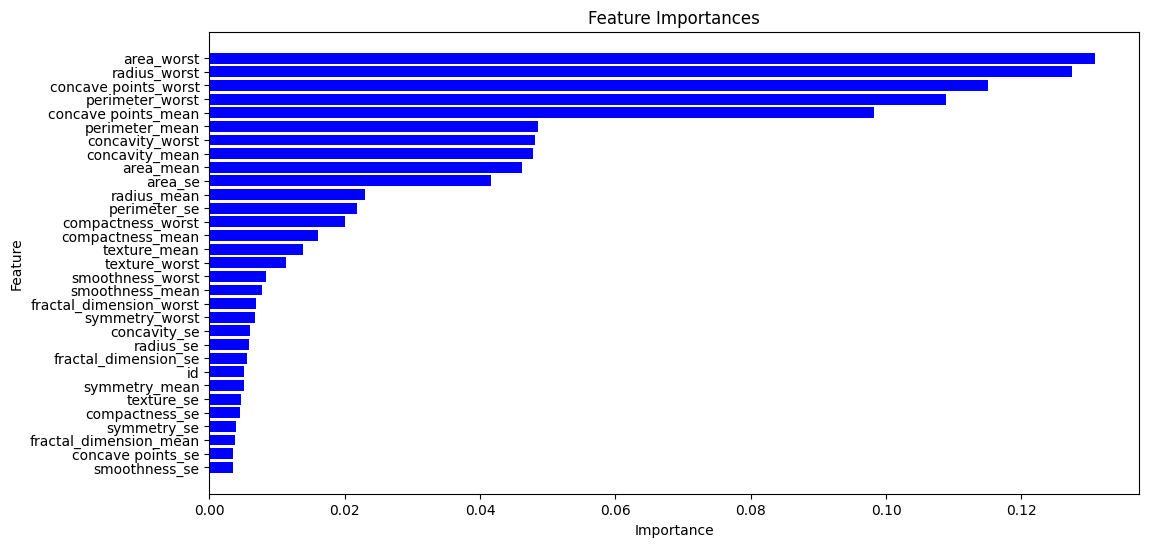

Removing the least important feature: smoothness_se


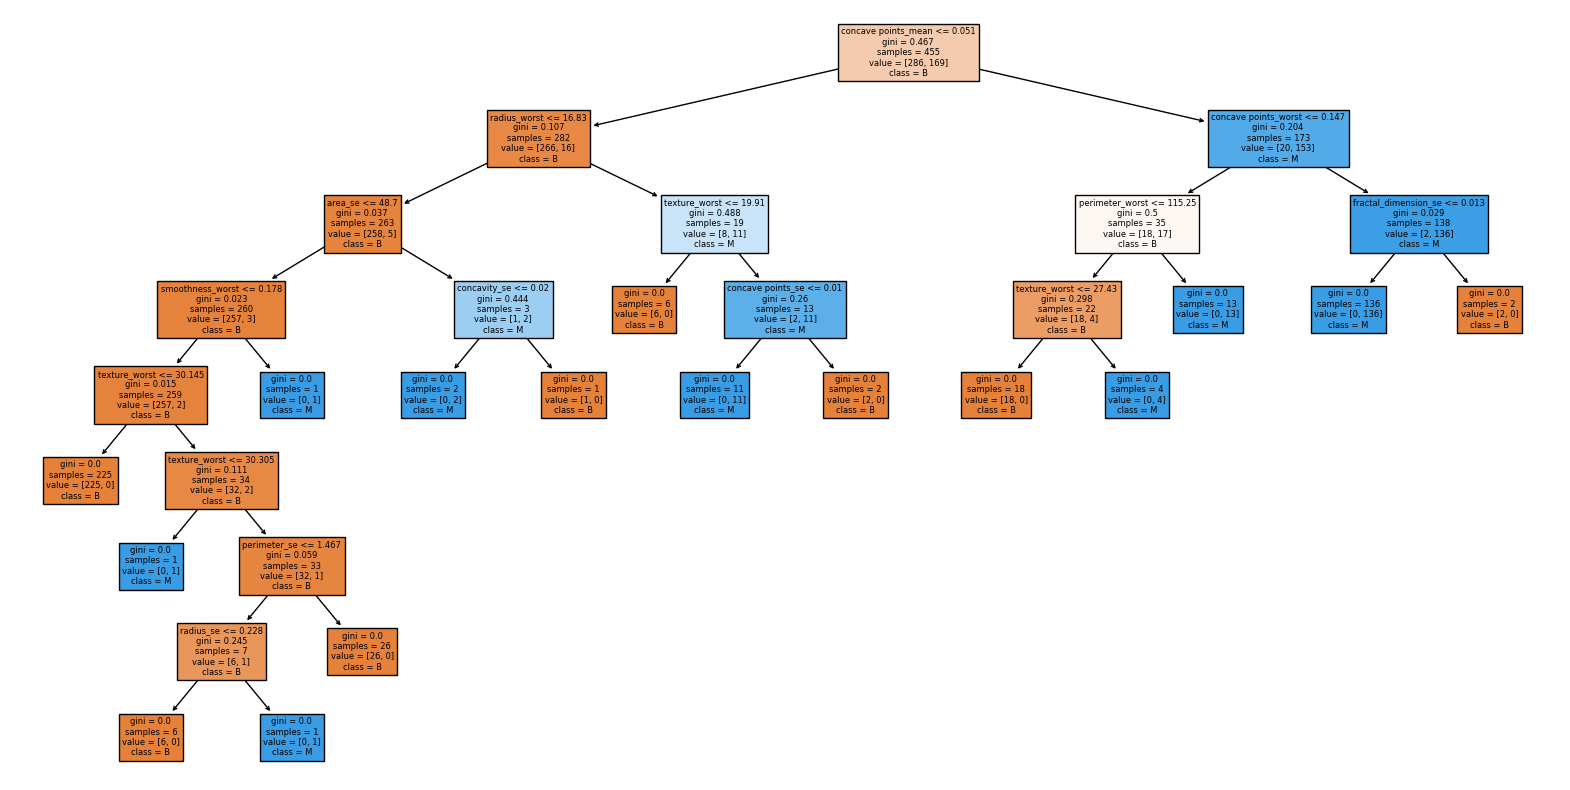

Training Time: 0.01 seconds
Accuracy: 0.92
Sensitivity (Recall) for Malignant: 0.91
Sensitivity (Recall) for Benign: 0.93
Confusion Matrix:
[[66  5]
 [ 4 39]]
Removing the four least important features: ['symmetry_se', 'fractal_dimension_mean', 'concave points_se', 'smoothness_se']


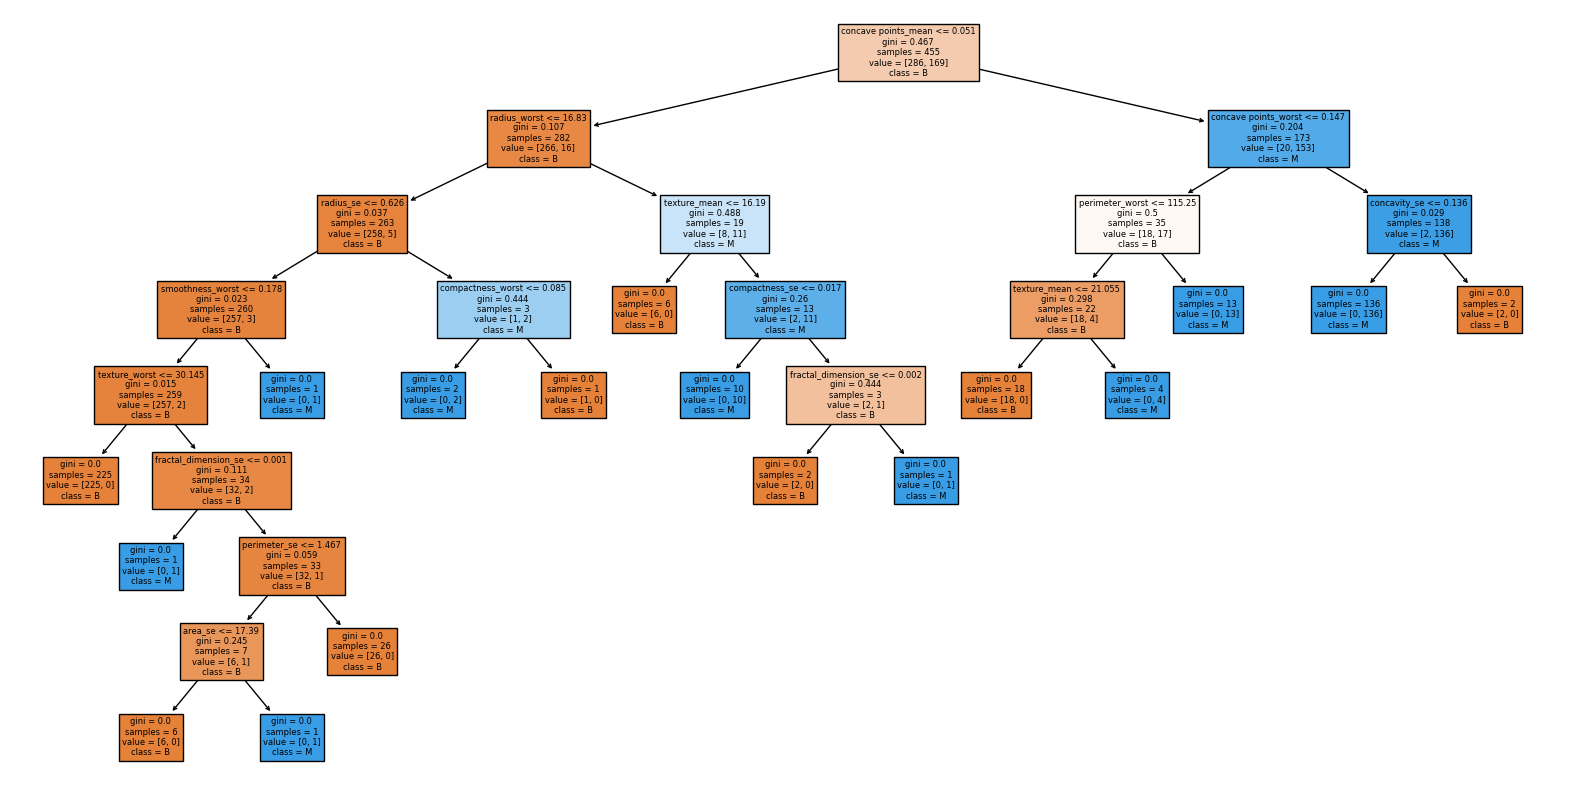

Training Time: 0.01 seconds
Accuracy: 0.93
Sensitivity (Recall) for Malignant: 0.93
Sensitivity (Recall) for Benign: 0.93
Confusion Matrix:
[[66  5]
 [ 3 40]]
Removing the ten least important features: ['radius_se', 'fractal_dimension_se', 'id', 'symmetry_mean', 'texture_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_mean', 'concave points_se', 'smoothness_se']


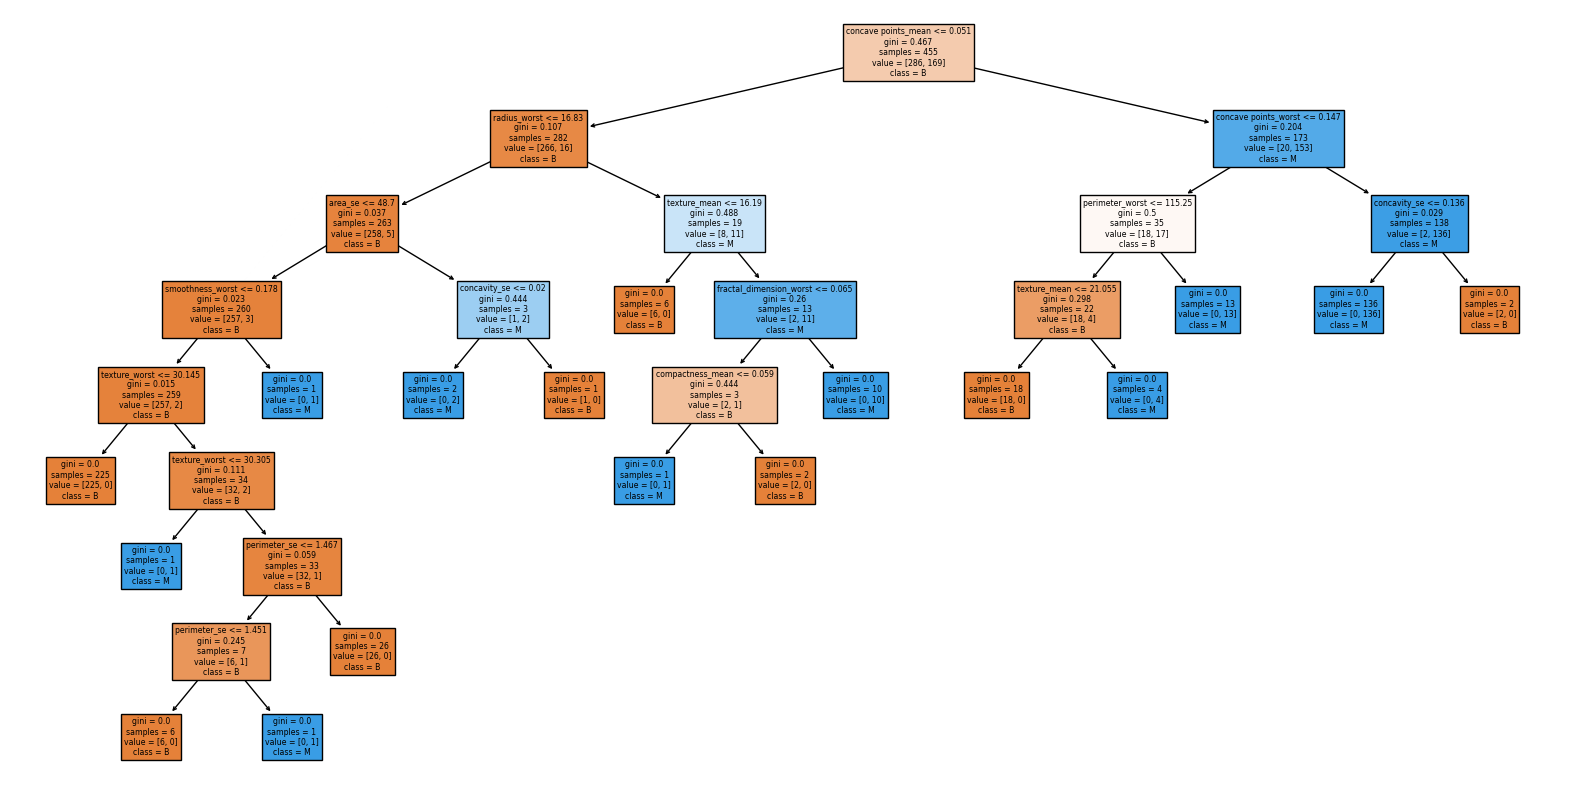

Training Time: 0.01 seconds
Accuracy: 0.94
Sensitivity (Recall) for Malignant: 0.93
Sensitivity (Recall) for Benign: 0.94
Confusion Matrix:
[[67  4]
 [ 3 40]]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
import time

# Load the dataset
df = pd.read_csv('breast-cancer.csv')

# Preprocess the data if needed
df_cleaned = df.dropna()

# Split features and target variable
X = df_cleaned.drop(columns=['diagnosis'])
y = df_cleaned['diagnosis']

# Train a Random Forest model to find feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(importance_df['Feature'], importance_df['Importance'], color='b', align='center')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

# Function to train and evaluate a Decision Tree model
def train_and_evaluate_decision_tree(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = DecisionTreeClassifier(random_state=42)
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    sensitivity = recall_score(y_test, predictions, pos_label="M")
    cm = confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    plt.figure(figsize=(20, 10))
    plot_tree(model, filled=True, feature_names=X.columns, class_names=['B', 'M'])
    plt.show()
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Sensitivity (Recall) for Malignant: {sensitivity:.2f}")
    print(f"Sensitivity (Recall) for Benign: {specificity:.2f}")
    print(f"Confusion Matrix:\n{cm}")

# Remove the feature with the lowest importance and retrain the Decision Tree model
X_reduced_1 = X.drop(columns=[importance_df['Feature'].iloc[-1]])
print("Removing the least important feature:", importance_df['Feature'].iloc[-1])
train_and_evaluate_decision_tree(X_reduced_1, y)

# Remove the four features with the lowest importance and retrain the Decision Tree model
X_reduced_4 = X.drop(columns=importance_df['Feature'].iloc[-4:])
print("Removing the four least important features:", list(importance_df['Feature'].iloc[-4:]))
train_and_evaluate_decision_tree(X_reduced_4, y)

# Remove the ten features with the lowest importance and retrain the Decision Tree model
X_reduced_10 = X.drop(columns=importance_df['Feature'].iloc[-10:])
print("Removing the ten least important features:", list(importance_df['Feature'].iloc[-10:]))
train_and_evaluate_decision_tree(X_reduced_10, y)
